#**LAB**-**2**

##Q1:

####Load the dataset and explore its structure.





####Check for missing values and handle them appropriately (e.g., imputation or removal).
####Describe the dataset's key statistics (mean, median, standard deviation).#

In [16]:
import pandas as pd
data=pd.read_csv("/content/DailyDelhiClimateTest.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [2]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [3]:
missing_values=data.isnull().sum()
print(missing_values)

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [4]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


##Q2:

###Time Series Visualization:

####Plot the time series for all variables (e.g., daily mean temperature and precipitation).
####Use subplots to visualize the relationship between temperature (mean, max, min) and wind speed over time.

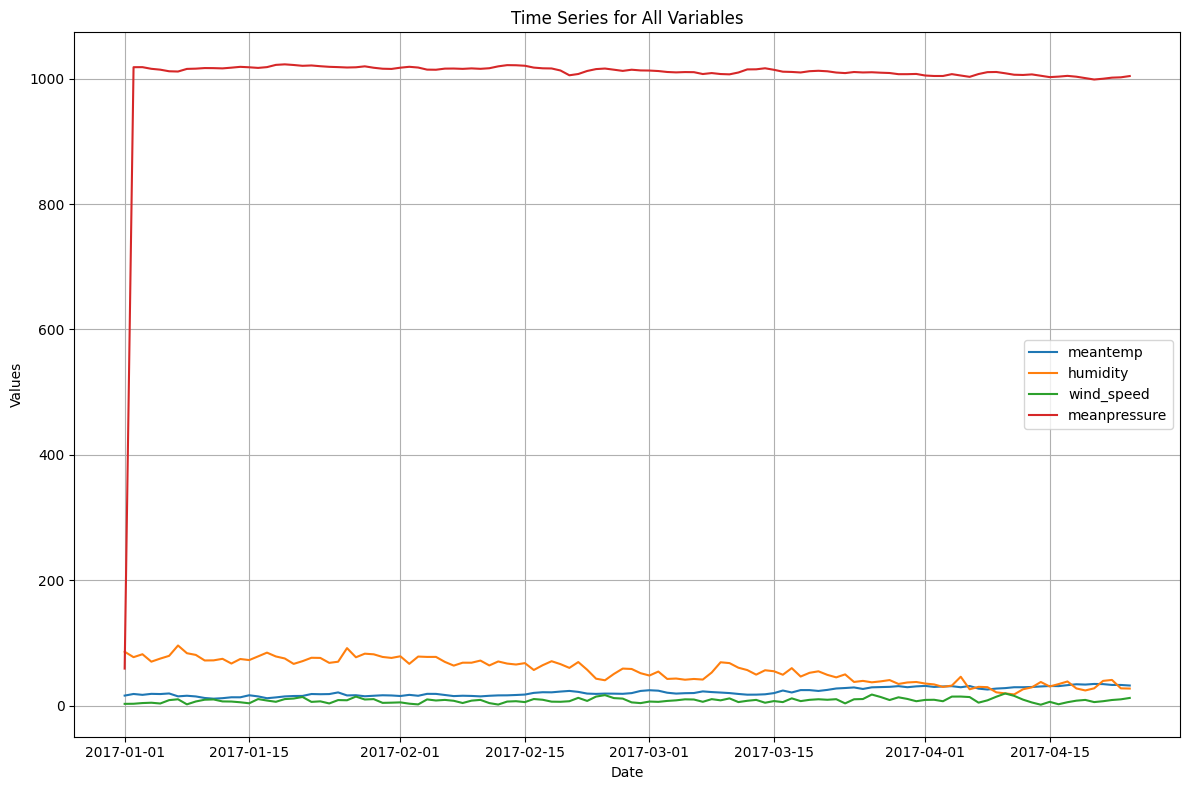

In [17]:
import matplotlib.pyplot as plt


data['date'] = pd.to_datetime(data['date'])

data.set_index('date', inplace=True)

plt.figure(figsize=(12, 8))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.title('Time Series for All Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

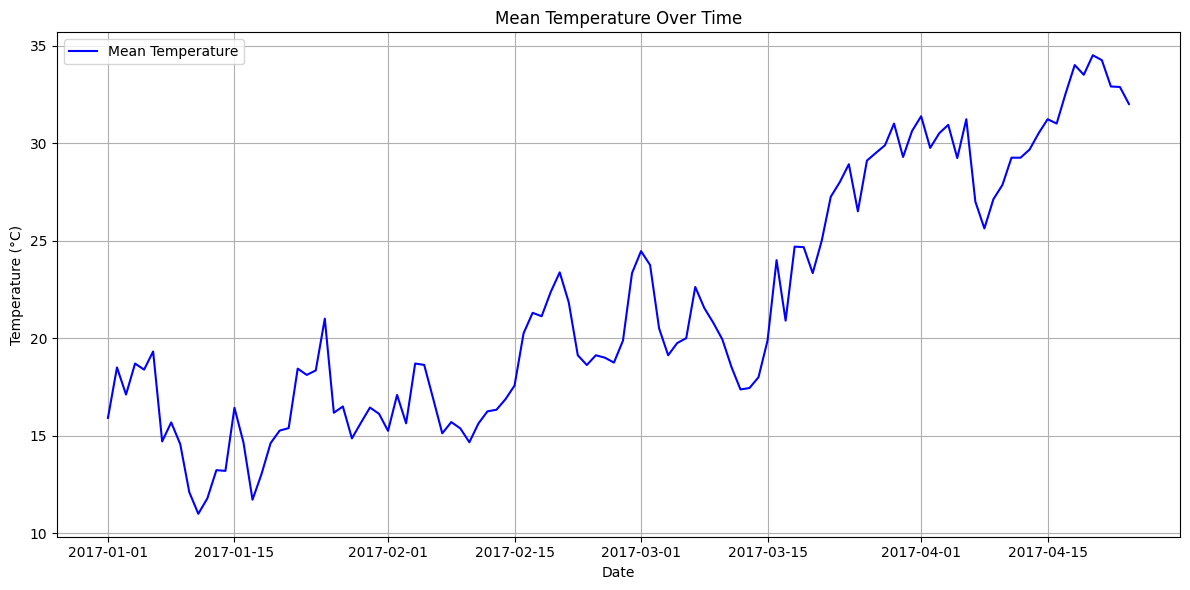

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['meantemp'], color='blue', label='Mean Temperature')
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

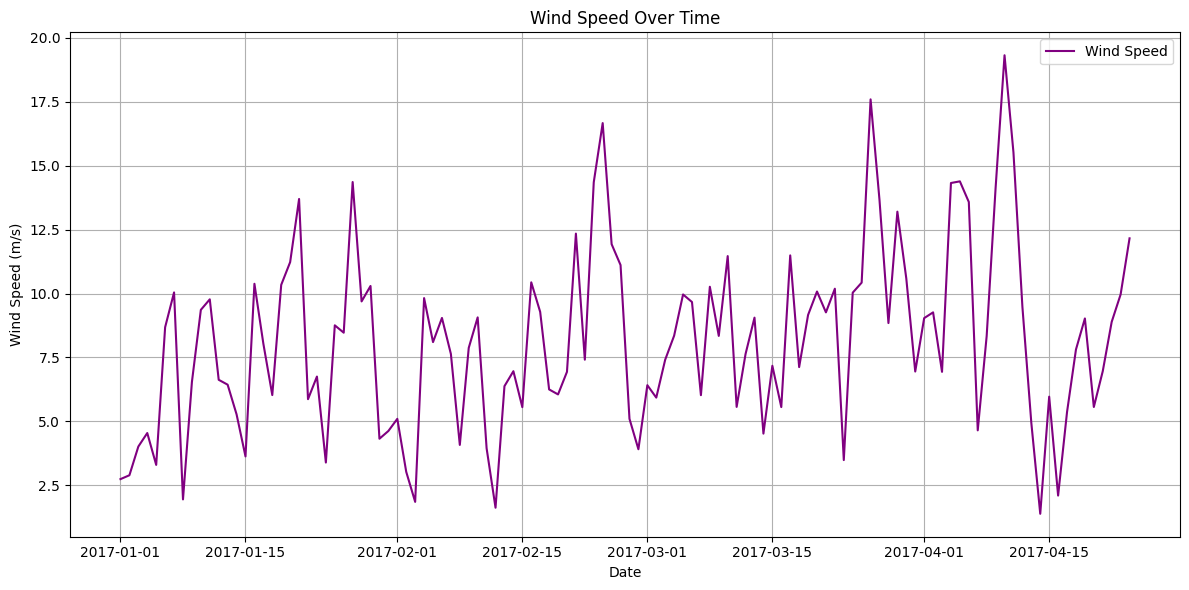

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['wind_speed'], color='purple', label='Wind Speed')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

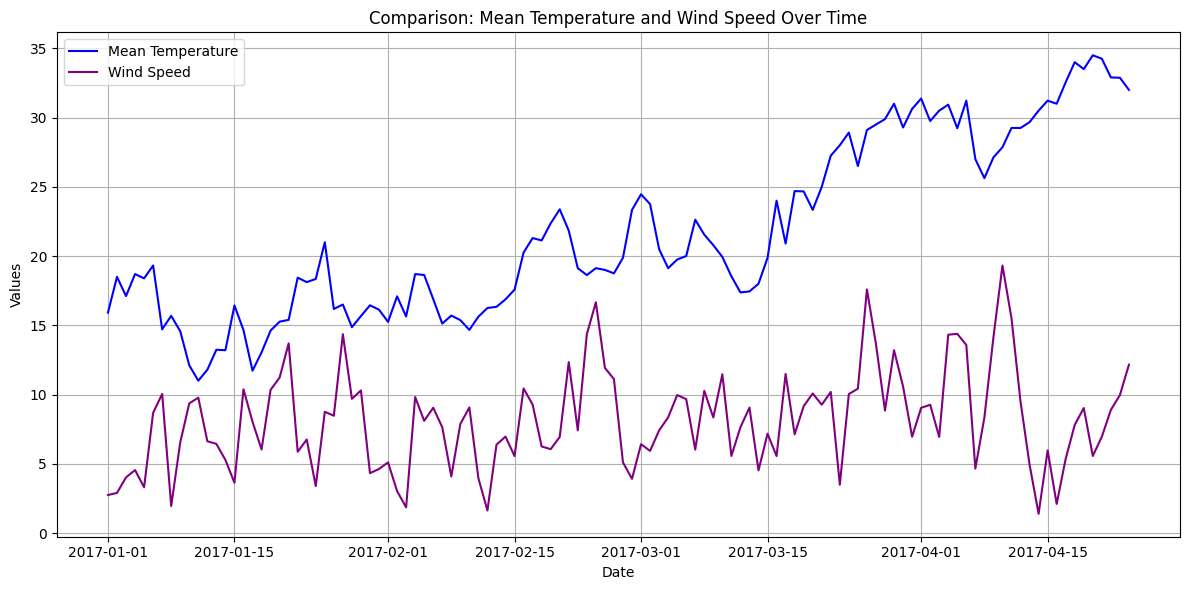

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['meantemp'], color='blue', label='Mean Temperature')
plt.plot(data.index, data['wind_speed'], color='purple', label='Wind Speed')
plt.title('Comparison: Mean Temperature and Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Q3

###Seasonality and Trends:

####Decompose the time series for daily mean temperature into its components (trend, seasonality, and residuals) using statistical decomposition methods.
Identify any seasonal patterns and discuss their significance.

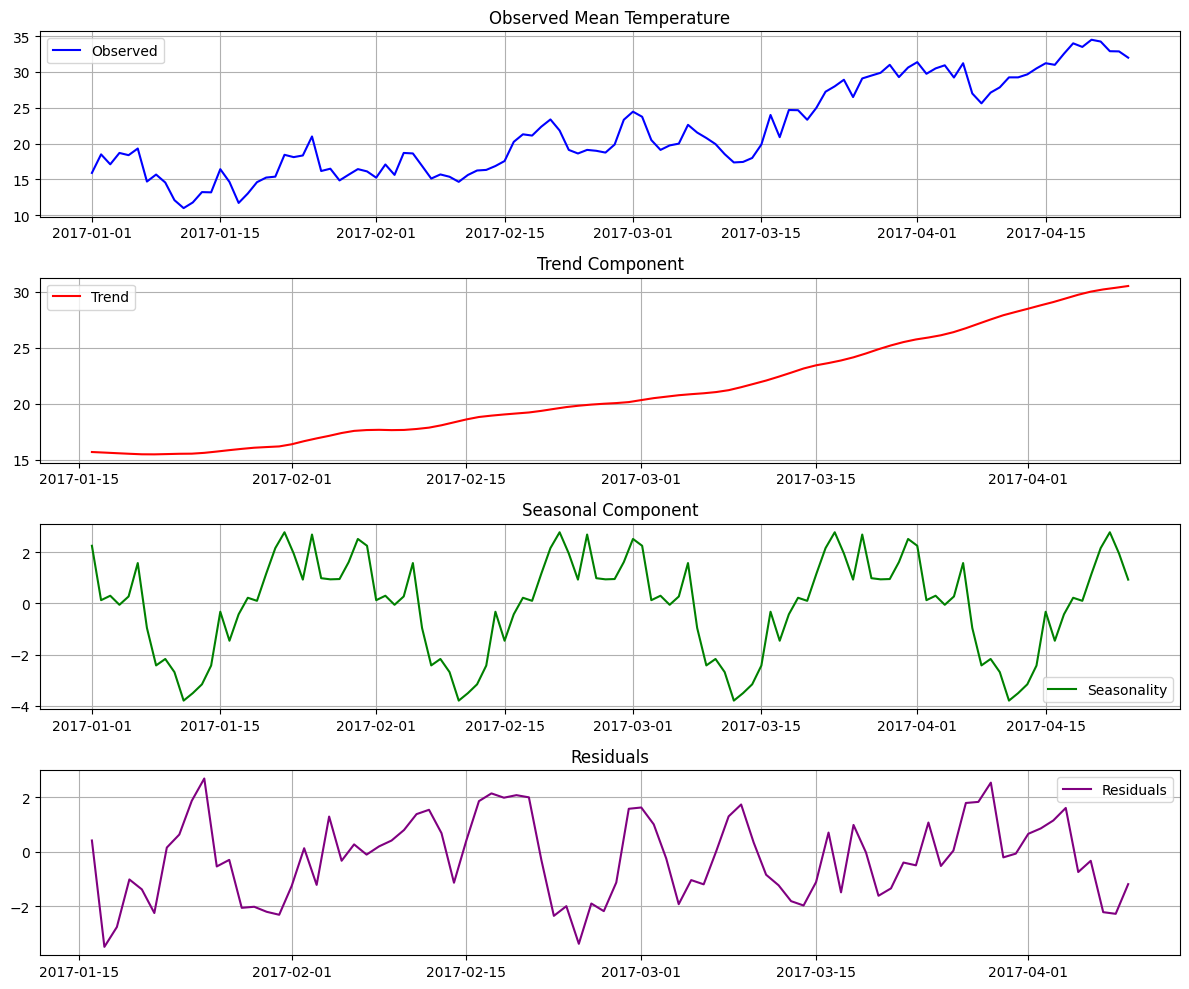

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['meantemp'], model='additive', period=30)


plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed', color='blue')
plt.title('Observed Mean Temperature')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='red')
plt.title('Trend Component')
plt.legend()
plt.grid(True)


plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals', color='purple')
plt.title('Residuals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##Q4:

####Select one variable (e.g., daily mean temperature) for forecasting.
####Split the dataset into training and testing sets.
####Fit Seasonal Decomposition of Time Series (STL) model to the training set.
####Evaluate the forecasting performance using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
target_variable = 'meantemp'
train_size = int(len(data) * 0.8)
train = data[target_variable][:train_size]
test = data[target_variable][train_size:]

print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")

Training set size: 91
Testing set size: 23


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


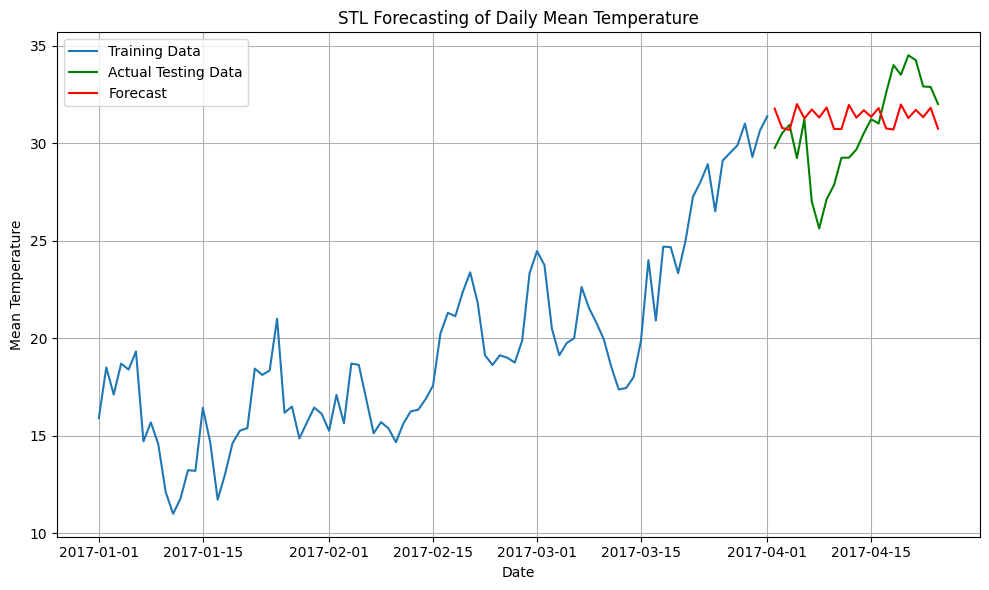

In [21]:
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
stl_model = STLForecast(train, ARIMA, model_kwargs={"order": (1, 1, 1)})
stl_result = stl_model.fit()
forecast = stl_result.forecast(steps=len(test))
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Testing Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('STL Forecasting of Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 2.07
Root Mean Squared Error (RMSE): 2.55
